## Import the required libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Data Colection and Analysis

In [69]:
# loading the data from csv file to a Pandas DataFrame
insurance_data = pd.read_csv('insurance.csv')

In [70]:
# first 5 rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
# number of rows and columns
insurance_data.shape

(1338, 7)

In [72]:
# getting some informations about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features in the insurance data:

Sex,
Smoker,
Region

In [73]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [74]:
# statistical Measures of the data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


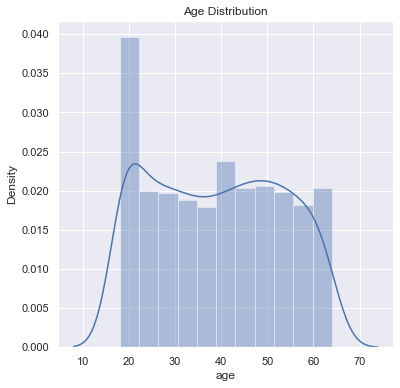

In [75]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

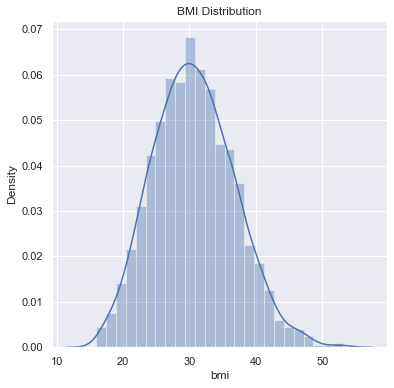

In [76]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

<AxesSubplot:xlabel='region', ylabel='count'>

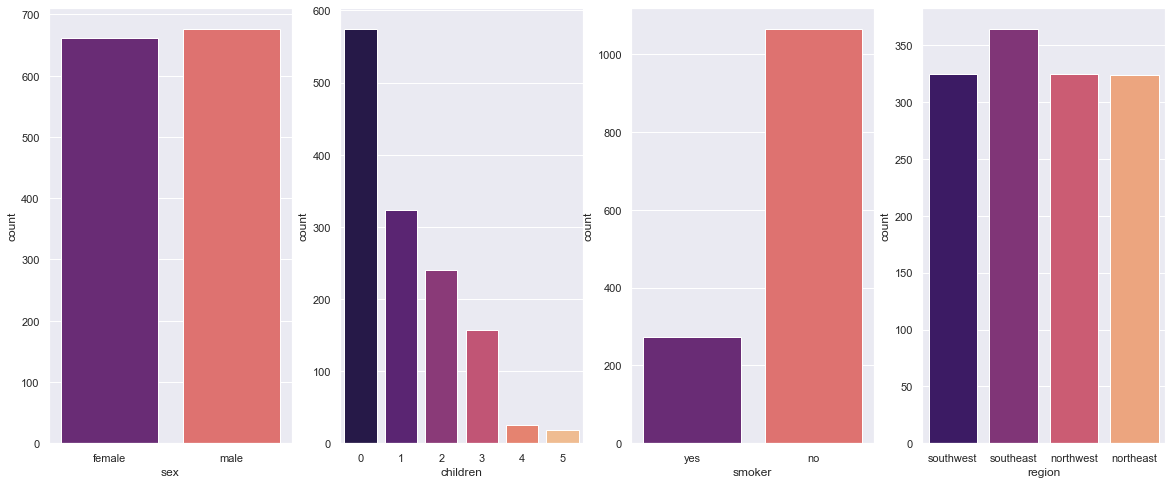

In [77]:
fig,axes=plt.subplots(1,4,figsize=(20,8))
sns.countplot(x = 'sex', data=insurance_data, palette = 'magma', ax=axes[0])
sns.countplot(x = 'children', data=insurance_data, palette = 'magma', ax=axes[1])
sns.countplot(x = 'smoker', data=insurance_data, palette = 'magma', ax=axes[2])
sns.countplot(x = 'region', data=insurance_data, palette = 'magma', ax=axes[3])

Text(0.5, 0.98, 'Correlation matrix of features')

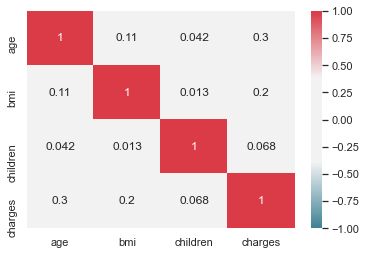

In [78]:
sns.heatmap(insurance_data.corr(), cmap=cmap, vmin=-1, vmax=1,annot = True)
fig.suptitle('Correlation matrix of features', fontsize=15)

Age and BMI are comparatively more closely related to charges

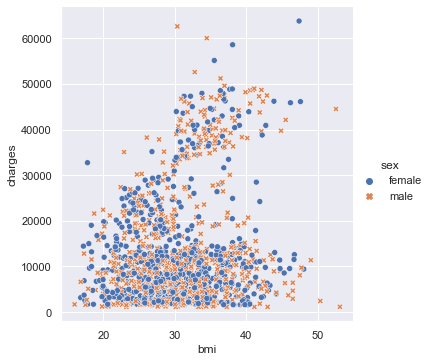

In [79]:
## Multivariate Analysis
sns.relplot(x = 'bmi', y = 'charges', hue = 'sex', style = 'sex', data = insurance_data);

<AxesSubplot:xlabel='smoker', ylabel='charges'>

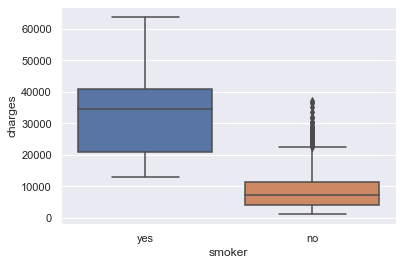

In [80]:
sns.boxplot(x = 'smoker', y = 'charges', data = insurance_data)

### Data Pre-Processing

### Encoding the categorical features

In [81]:
# encoding sex column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

### Splitting the Features and Target

In [82]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

### Splitting the data into Training data & Testing Data

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [84]:
# loading the Linear Regression model
regressor = LinearRegression()

In [85]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [86]:
# prediction on test data
Y_pred = regressor.predict(X_test)

### Predicting the accuracy score

In [87]:
# predicting the accuracy score
print(metrics.r2_score(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.7447273869684077
Mean Squared Error: 38337035.48643883
Root Mean Squared Error: 6191.690842285234


### Build a predictive system

In [88]:
input_data = (31,1,25.74,0,0,0)

# changing input_data to a numpy array
input_data_numpy = np.asarray(input_data)

# reshape the array
input_data_reshape = input_data_numpy.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.080576496046


## Predicted Charges using OLS

In [89]:
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
age = 31
sex = 1
bmi = 25.74
children = 0
smoker = 0
region = 0
print ('Predicted Charges: \n', regr.predict([[age, sex, bmi, children, smoker, region]]))

# with statsmodels
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -13036.652967909555
Coefficients: 
 [  256.96796596   128.95608532   337.0245187    468.35404686
 23867.05868713   297.83720698]
Predicted Charges: 
 [3733.32117344]
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              1265.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:47:40   Log-Likelihood:                         -10882.
No. Observations:                1070   AIC:                                  2.178e+04
Df Residuals:                    1064   BIC:                                  2.181e+04
Df Model:                           6                                                  
Covariance Type:            n